# Decision Tree carbon, silicon, and nitrogen isotopes

In [1]:
#Imports
import joblib
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Read the CSV file

In [2]:
# Read the csv and create a dataframe
C_Si_N = pd.read_csv('presolargrains_C_Si_N.csv')
C_Si_N.head()

,Type,carbon_12_13,nitrogen_14_15,silicon_29_28,silicon_30_28
0,X,74.30,207.4,-685.0,-520.0
1,X,1581.00,116.0,-684.0,-490.0
2,X,234.75,187.2,-683.0,-501.0
3,X,455.00,140.0,-662.0,-770.0
4,X,823.00,44.0,-658.0,-234.0


## Set up target

In [10]:
# Set up the target column and the target names
target = C_Si_N["Type"]
target_names = ["AB", "C", "M", "N", "U","X", "Y", "Z"]

## Set up data and feature names

In [11]:
# Set up data and feature names; display dataframe after Type is dropped
data = C_Si_N.drop("Type", axis=1)
feature_names = data.columns
data.head()

,carbon_12_13,nitrogen_14_15,silicon_29_28,silicon_30_28
0,74.30,207.4,-685.0,-520.0
1,1581.00,116.0,-684.0,-490.0
2,234.75,187.2,-683.0,-501.0
3,455.00,140.0,-662.0,-770.0
4,823.00,44.0,-658.0,-234.0


## Create Train Test Split

In [12]:
# Separate data into train and test buckets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

## Scale the data using MinMaxScalar

In [13]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the model; Run the test score

In [14]:
# Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9570552147239264

## Graph the decision tree

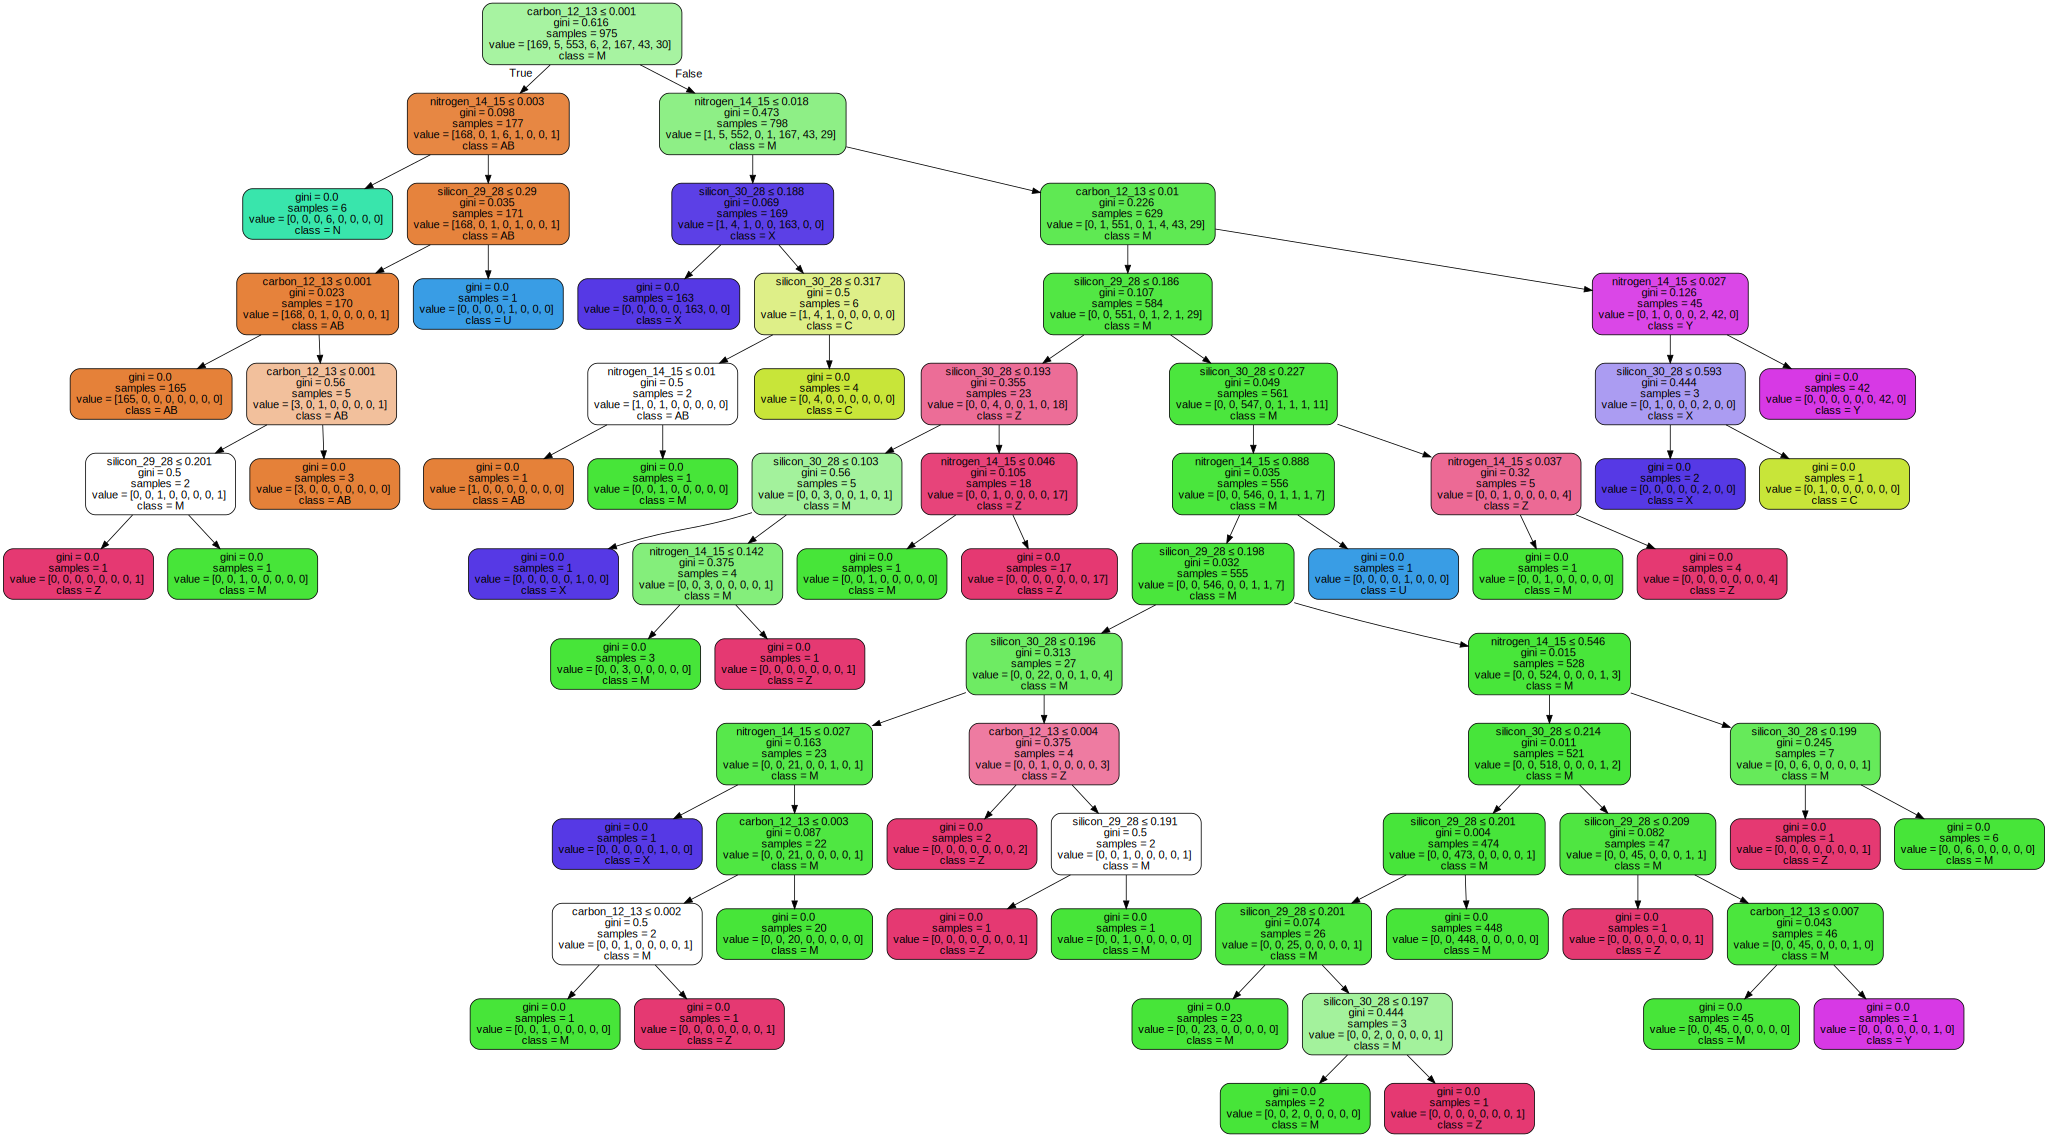

In [15]:
# Graph the Decision Tree (scroll down and to the right until the boxes appear below)
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('meteorite_C_Si_N.png')

graph = graphviz.Source(dot_data)  
graph 

# See the Summary below the graphed tree.

## Save the model

In [16]:
# Save model to file
filename = 'DecisionTree_C_Si_N.sav'
joblib.dump(clf, filename)

['DecisionTree_C_Si_N.sav']

## Summary: 

### Decision Tree carbon, silicon, and nitrogen: 95.7%